In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [4]:
file = 'data.csv'
file_df = pd.read_csv(file)
File_df = pd.DataFrame(file_df)
File_df['Countries'].value_counts().head(25)
America = File_df.loc[(File_df['Countries'] == 'United States of America') |
                      (File_df['Countries'] == 'Mexico') |
                      (File_df['Countries'] == 'Canada') |
                      (File_df["Countries"] == 'Canada, United States of America'),:]
America

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
68,1506,Huasteca Náhuatl,náhuatl du Huasteca,nahua de la Huasteca,Mexico,MEX,nhe,Vulnerable,Mexicano,NaN,463183.0,"Census 2000, information provided by INALI for...",21.3835,-98.9902,Locality of Xilitla and others in the municipa...
82,1503,Central Náhuatl,náhuatl central,nahua central,Mexico,MEX,"nhn, nch, ncx",Vulnerable,"Mexicano, Aztec (in English only)",NaN,395581.0,"Census 2000, information provided by INALI for...",19.1910,-99.0236,Locality of Milpa Alta and others with few rem...
156,784,Navajo,navajo,navajo,United States of America,USA,nav,Vulnerable,"Navajo, Diné",NaN,120000.0,"Platero, Paul. 2001. Navajo head start languag...",35.8044,-108.4750,the Navajo Nation is located in the region of ...
160,916,Sierra Totonac,totonaque de la Sierra,totonacano de Sierra,Mexico,MEX,tos,Severely endangered,"Highland Totonac, Totonaco central del sur",NaN,118367.0,Contributors: Carolyn MacKay and Frank Tresche...,20.2461,-97.6586,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
166,904,Phurhepecha,purepecha,purépecha,Mexico,MEX,tsz,Vulnerable,"Purépecha, Tarasco, Porhé",NaN,102988.0,Census 2000\nContributor: Claudine Chamoreau ...,19.3111,-102.0410,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2391,Tuscarora (Canada),tuscarora (Canada),tuscarora (Canadá),Canada,CAN,tus,Critically endangered,NaN,NaN,NaN,"1996 and 2001 Censuses, Statistics Canada; bas...",43.0720,-80.0150,Spread over 2 communities in Canada
2706,280,Unami,delaware,unamí,United States of America,USA,unm,Extinct,"Delaware, Oklahoma Delaware, Lenape",NaN,NaN,Golla et al ms.,39.1300,-76.0253,NaN
2707,2392,Upper Tanana (Canada),haut-tanana (Canada),tanana alto (Canadá),Canada,CAN,tau,Critically endangered,NaN,NaN,NaN,"1996 and 2001 Censuses, Statistics Canada; bas...",62.3824,-140.8984,Spread over 1 communities in Canada
2711,2393,Western Abenaki (Canada),abénaqui occidental (Canada),abenakí occidental (Canadá),Canada,CAN,abe,Critically endangered,NaN,NaN,NaN,"1996 and 2001 Censuses, Statistics Canada; bas...",46.0785,-72.8141,Spread over 2 communities in Canada


In [6]:
File_DF = America.iloc[:, [0, 1, 4, 7, 10, 12, 13, 14]]
Population_Dict = {'Mexico':126200000, 'Canada':36740000, 'United States of America':325000000, 'Canada, United States of America':361740000}
File_DF['Population'] = File_DF['Countries'].map(Population_Dict)
File_DF['Speaker Percentage'] = (File_DF['Number of speakers'] / File_DF['Population'])*100
File_DF["Speaker Percentage"] = File_DF["Speaker Percentage"].map("{:,.2f}%".format)
File_DF = File_DF[['ID', 'Name in English', 'Countries', 
                   'Number of speakers', 'Population', 'Speaker Percentage',
                  'Latitude', 'Longitude', 'Degree of endangerment', 'Description of the location']]
File_DF.set_index('ID', inplace=True)
File_DF
#Count = pd.DataFrame(File_DF.groupby(['Countries']).count()['Degree of endangerment'])
#Count.plot(kind='barh')
File_DF

C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Name in English,Countries,Number of speakers,Population,Speaker Percentage,Latitude,Longitude,Degree of endangerment,Description of the location
ID,,,,,,,,,
1506,Huasteca Náhuatl,Mexico,463183.0,126200000,0.37%,21.3835,-98.9902,Vulnerable,Locality of Xilitla and others in the municipa...
1503,Central Náhuatl,Mexico,395581.0,126200000,0.31%,19.1910,-99.0236,Vulnerable,Locality of Milpa Alta and others with few rem...
784,Navajo,United States of America,120000.0,325000000,0.04%,35.8044,-108.4750,Vulnerable,the Navajo Nation is located in the region of ...
916,Sierra Totonac,Mexico,118367.0,126200000,0.09%,20.2461,-97.6586,Severely endangered,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
904,Phurhepecha,Mexico,102988.0,126200000,0.08%,19.3111,-102.0410,Vulnerable,NaN
...,...,...,...,...,...,...,...,...,...
2391,Tuscarora (Canada),Canada,NaN,36740000,nan%,43.0720,-80.0150,Critically endangered,Spread over 2 communities in Canada
280,Unami,United States of America,NaN,325000000,nan%,39.1300,-76.0253,Extinct,NaN
2392,Upper Tanana (Canada),Canada,NaN,36740000,nan%,62.3824,-140.8984,Critically endangered,Spread over 1 communities in Canada


In [7]:
Vulnerable_Df = File_DF.loc[File_DF['Degree of endangerment'] == "Extinct", :]
Vulnerable_Df.groupby(['Number of speakers']).count()

,Name in English,Countries,Population,Speaker Percentage,Latitude,Longitude,Degree of endangerment,Description of the location
Number of speakers,,,,,,,,
0.0,52,52,52,52,52,52,52,21


In [59]:
Endangered_DF = File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :] 
Endangered_DF_2 = File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]
Endangered_DF = Endangered_DF.groupby(['Countries']).count()['Population']
Endangered_DF_2 = Endangered_DF_2.groupby(['Countries']).count()['Population']
Endangered_DF_2
Length = 4
Width = 0.3
plt.bar()
#Endangered_DF.plot(kind='pie', subplots='True')
#Endangered_DF.plot(kind='barh')

Countries
Canada                              12
Canada, United States of America     5
Mexico                              32
United States of America            40
Name: Population, dtype: int64

In [ ]:
Mexico_DF = File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :] 
Endangered_DF_2 = File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]
Endangered_DF = Endangered_DF.groupby(['Countries']).count()['Population']
Endangered_DF_2 = Endangered_DF_2.groupby(['Countries']).count()['Population']
Endangered_DF_2
Length = 4
Width = 0.3
plt.bar()
#Endangered_DF.plot(kind='pie', subplots='True')

In [ ]:
Degree = pd.DataFrame(File_DF.groupby(['Countries', 'Degree of endangerment']).count()['ID'])
degree = Degree.iloc[8:12]
degree.plot(kind='pie', subplots='True')

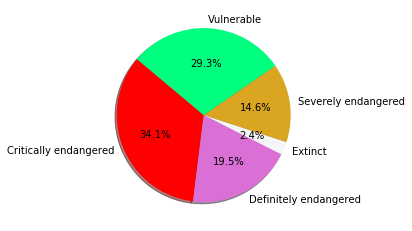

In [11]:
labels = ["Critically endangered", "Definitely endangered","Extinct", "Severely endangered", "Vulnerable"]
sizes = [28,16,2,12,24]
colors = ["red", "orchid", "whitesmoke", "goldenrod", "springgreen"]
explode = (0,0,0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = "Canada"

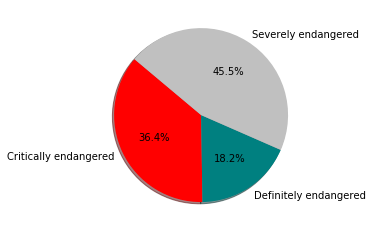

In [14]:
labels = ["Critically endangered", "Definitely endangered","Severely endangered"]
sizes = [4,2,5]
colors = ["red", "teal","silver"]
explode = (0,0,0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = "Canada"

In [ ]:
df2 = pd.DataFrame({
    'Degree': ['Vulnerable', 'Definetly endangered', 'Critically endangered', 'Severly endangered', 'Extinct']})
df = pd.merge(df, df2, on='day')
df = df.sort_values('num')
dfx = df.groupby(['group'])
dfx.plot(kind='bar', x='day')

In [ ]:
df=pd.DataFrame({
    'group':['a','a','a','a','a','a','a','b','b','b','b','b','b','b'],
    'day':['Mon','Tues','Fri','Thurs','Sat','Sun','Weds','Fri','Sun','Thurs','Sat','Weds','Mon','Tues'],
    'amount':[1,2,4,2,1,1,2,4,5,3,4,2,1,3]
})
# Calculate the total amount for each day
df_grouped = df.groupby(['day']).sum().amount.reset_index()
# Use Dan's trick to order days names in the table created by groupby
weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df_grouped['day'].map(mapping)    
df_grouped = df_grouped.iloc[key.argsort()]
# Draw the bar chart
df_grouped.plot(kind='bar', x='day')

In [ ]:
File_df.head(25)